<a href="https://colab.research.google.com/github/Ruy8/RuyAramis_Mineria/blob/main/Equipo3_T%C3%A9cnicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio técnicas de minería

# Minería de datos grupo 001 Lunes 

## Equipo 3:

- ### González Berumen Ricardo        1941497
- ### Gaytán Gutiérrez José Claudio   1855455
- ### López Verduzco Ruy Aramis       1863861
- ### Rodríguez Pacheco Nancy Janeth  1845816
- ### Ruiz Espitia Thalía             1941494


## Referencias

### El código presentado en este documento se hizo con la ayuda de las siguientes refenecias: 
- ### https://pharos.sh/mineria-de-reglas-de-asociacion-a-traves-del-algoritmo-apriori-en-python/
- ### https://www.jacobsoft.com.mx/es_mx/aprendizaje-con-reglas-de-asociacion/

##  Reglas de asociación 

### Como obhetivo principal se quiere encontrar en que momento del día se compran ciertos productos, así como también que productos van acompañados en las transacciones. 
### Es por esto que se utilizaron reglas de asociación, para así conseguir los itemsets más repetidos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
datos = pd.read_csv("bread_basket.csv")
print("Número de filas y columnas", datos.shape)
print("Nombre de las columnas", datos.columns)
columnas = datos.columns

Número de filas y columnas (20507, 5)
Nombre de las columnas Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend'], dtype='object')


In [ ]:
datos.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [ ]:
transacciones = []
for i in range(0,20507):
  transacciones.append([str(datos.values[i,j]) for j in range(0,5)])

In [ ]:
from apyori import apriori
itemsets = apriori(transacciones, min_support = 0.005, min_confidence = 0.001, min_lift = 1.001, min_length = 2)
itemsets = list(itemsets)

In [ ]:
print(len(itemsets))
print(itemsets[0])

80
RelationRecord(items=frozenset({'Alfajores', 'afternoon'}), support=0.011947140000975277, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Alfajores'}), items_add=frozenset({'afternoon'}), confidence=0.6639566395663957, lift=1.1769175216170866), OrderedStatistic(items_base=frozenset({'afternoon'}), items_add=frozenset({'Alfajores'}), confidence=0.021177284121358803, lift=1.1769175216170866)])


In [ ]:
for item in itemsets:

  pair = item[0]
  items = [x for x in pair]
  print("Regla: " + items[0] + "->" + items[1])

  print("Soporte: " + str(item[1]))

  print("Confianza: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3]))
  print("---------------------------------")

Regla: Alfajores->afternoon
Soporte: 0.011947140000975277
Confianza: 0.6639566395663957
Lift: 1.1769175216170866
---------------------------------
Regla: Alfajores->weekday
Soporte: 0.011313210123372507
Confianza: 0.6287262872628726
Lift: 1.0067377194424711
---------------------------------
Regla: morning->Bread
Soporte: 0.0785097771492661
Confianza: 0.4842105263157894
Lift: 1.1815451288859942
---------------------------------
Regla: weekday->Bread
Soporte: 0.10201394645730726
Confianza: 0.629172932330827
Lift: 1.0074529025773618
---------------------------------
Regla: Brownie->afternoon
Soporte: 0.012142195347929974
Confianza: 0.6569920844327177
Lift: 1.1645722772462392
---------------------------------
Regla: Brownie->weekend
Soporte: 0.008387379919052031
Confianza: 0.45382585751978893
Lift: 1.2086502415790015
---------------------------------
Regla: Cake->afternoon
Soporte: 0.03564636465597113
Confianza: 0.713170731707317
Lift: 1.2641535305663367
---------------------------------
R

In [ ]:
def inspect(itemsets):
  rh = [tuple(result[2][0][1]) for result in itemsets]
  lh = [tuple(result[2][0][0]) for result in itemsets]
  soporte = [result[1] for result in itemsets]
  confianza = [result[2][0][2] for result in itemsets]
  lift = [result[2][0][3] for result in itemsets]
  return list(zip(rh, lh, soporte, confianza, lift))

In [ ]:
Tabla = pd.DataFrame(inspect(itemsets), columns=["lhs", "rhs", "soporte", "confianza", "lift"])
Tabla

,lhs,rhs,soporte,confianza,lift
0,"(afternoon,)","(Alfajores,)",0.011947,0.663957,1.176918
1,"(weekday,)","(Alfajores,)",0.011313,0.628726,1.006738
2,"(morning,)","(Bread,)",0.078510,0.484211,1.181545
3,"(weekday,)","(Bread,)",0.102014,0.629173,1.007453
4,"(afternoon,)","(Brownie,)",0.012142,0.656992,1.164572
...,...,...,...,...,...
75,"(weekday, afternoon)","(Soup,)",0.012484,0.748538,2.110583
76,"(weekday, afternoon)","(Tea,)",0.029648,0.423693,1.194649
77,"(weekend, afternoon)","(Tea,)",0.015702,0.224390,1.071129
78,"(morning, Tea)","(weekday,)",0.015995,0.025611,1.151765


## Series de tiempo

### Como se quiere como objetivo secundario ver la tendencia de las ventas, haciendo una serie de tiempo se puede lograr este objetivo

In [ ]:
#Rutina para cambiar formato de la fecha
year = []
month = []
day = []
cleanDate = []
for fecha in datos["date_time"]:
    #print(fecha)
    #Para separar año
    for fechaseparada in fecha.split("-"):
        if len(fechaseparada)>2:
            yearTEMP = fechaseparada.split(" ")[0]
            year.append(yearTEMP)
    #Para separar dia
    dayTEMP = fecha.split("-")[0]
    day.append(dayTEMP)
    #Para separar mes
    monthTEMP = fecha.split("-")[1]
    month.append(monthTEMP)
    clean = yearTEMP + "-" + monthTEMP + "-" + dayTEMP
    cleanDate.append(clean)

#print(cleanDate)
#Agregamos las columnas a la base de datos
data_cleandate = datos.assign(clean_date = cleanDate,year = year, month = month, day = day)
data_cleandate

,Transaction,Item,date_time,period_day,weekday_weekend,clean_date,year,month,day
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,2016,10,30
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09


In [ ]:
serieVentas = data_cleandate.groupby(by = "clean_date").size().reset_index(name='counts').sort_values(by = "clean_date", ascending=True)
print(serieVentas)

     clean_date  counts
0    2016-10-30     170
1    2016-10-31     199
2    2016-11-01     150
3    2016-11-02     164
4    2016-11-03     189
..          ...     ...
154  2017-04-05     143
155  2017-04-06     118
156  2017-04-07      99
157  2017-04-08     205
158  2017-04-09      69

[159 rows x 2 columns]


<AxesSubplot:>

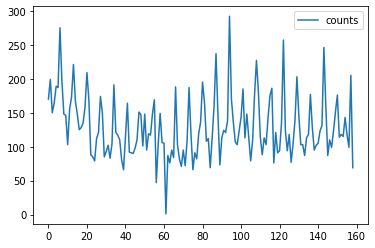

In [ ]:
serieVentas.plot.line()

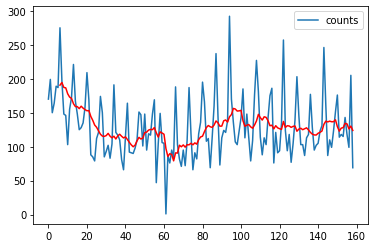

In [ ]:
media=serieVentas.rolling(7).mean()
serieVentas.plot.line()
plt.plot(media,color="red")

## Conclusión

### Los resultados obtenidos son lor esperados para los objetivos que se tienen planteados, se logra ver de manera clara los  itemsets más repetitivos que se tienen en la panadería, así como se logró visualizar la tendencia que tiene  la serie de tiempo haciendo una media movil por semana.
### Las técnicas utlilizadas permiten  hacer un cambio significativo en la panadería , y son las adecuadas para el tipo de datos que se encuentran en el registro.
### Como áreas de oportunidad, todavía se puede hacer un análisis especifico de los productos más importantes, así como explorar más el área para realizar predicciones.